# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re, nltk
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Stupidly tried BA again aft...
1,Not Verified | Seat horribly narrow; 3-4-3 on...
2,✅ Trip Verified | Glasgow to London delayed b...
3,✅ Trip Verified | When I tried to check in on...
4,✅ Trip Verified | I flew from Prague to LHR. ...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df = df[df["reviews"].str.contains("Not Verified") == False]
df.head

<bound method NDFrame.head of                                                reviews
0    ✅ Trip Verified |  Stupidly tried BA again aft...
2    ✅ Trip Verified |  Glasgow to London delayed b...
3    ✅ Trip Verified |  When I tried to check in on...
4    ✅ Trip Verified |  I flew from Prague to LHR. ...
5    ✅ Trip Verified |  Disappointing again especia...
..                                                 ...
995  ✅ Trip Verified |  Milan to London Heathrow. T...
996  ✅ Trip Verified |  London to Helsinki, Busines...
997  ✅ Trip Verified |  London Heathrow to Denver. ...
998  ✅ Trip Verified | It was a 13 hours flight fro...
999  ✅ Trip Verified |  Worst business class I flew...

[838 rows x 1 columns]>

In [10]:
data = pd.DataFrame([df['reviews'].iloc[i].removeprefix("✅ Trip Verified | ") for i in range(len(df))])

In [14]:
data[0]

0       Stupidly tried BA again after a five year gap...
1       Glasgow to London delayed by 1 hour. My wife ...
2       When I tried to check in online, I was offere...
3       I flew from Prague to LHR. Excellent service,...
4       Disappointing again especially on business. T...
                             ...                        
833     Milan to London Heathrow. The service and cle...
834     London to Helsinki, Business class, Friday 23...
835     London Heathrow to Denver. Words cannot expre...
836    It was a 13 hours flight from Heathrow to Kual...
837     Worst business class I flew, you are facing a...
Name: 0, Length: 838, dtype: object

In [ ]:
!pip install Unidecode

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
import unidecode


def clean (text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
    
    tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return " ".join(without_stopwords)

data['clean_text'] = data[0].apply(clean)
data.head()

,0,clean_text
0,Stupidly tried BA again after a five year gap...,stupidly tried ba five year gap paid wife go b...
1,Glasgow to London delayed by 1 hour. My wife ...,glasgow london delayed hour wife accept ba fli...
2,"When I tried to check in online, I was offere...",tried check online offered upgrade premium eco...
3,"I flew from Prague to LHR. Excellent service,...",flew prague lhr excellent service attentive st...
4,Disappointing again especially on business. T...,disappointing especially business service anci...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (2,2), 
                             min_df=0.01, 
                             max_df = 0.05).fit(data.clean_text)

In [21]:
vectors = pd.DataFrame(vectorizer.transform(data.clean_text).toarray(),
                       columns = vectorizer.get_feature_names_out())
vectors.head()

,ahead schedule,air france,airways flight,aisle seat,american airlines,another airline,another flight,arrived airport,ba business,ba cabin,...,way back,well done,whole experience,wi fi,window seat,world traveller,would expect,would recommend,year old,years ago
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.768851,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.325783,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
sum_tfidf = vectors.sum(axis = 0)
sum_tfidf

ahead schedule        9.005284
air france            5.004460
airways flight        3.796440
aisle seat           10.014767
american airlines     5.956688
                       ...    
world traveller       6.344530
would expect          4.894871
would recommend       6.250637
year old              4.462551
years ago             6.677818
Length: 213, dtype: float64

In [27]:
# Transforming the reviews data by removing stopwords, using regular expressions module to accept only letters,
 # tokenizing those words and then making all the words lower case for consistency.
comments = []
stop_words = set(stopwords.words('english'))


for words in data.clean_text:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))

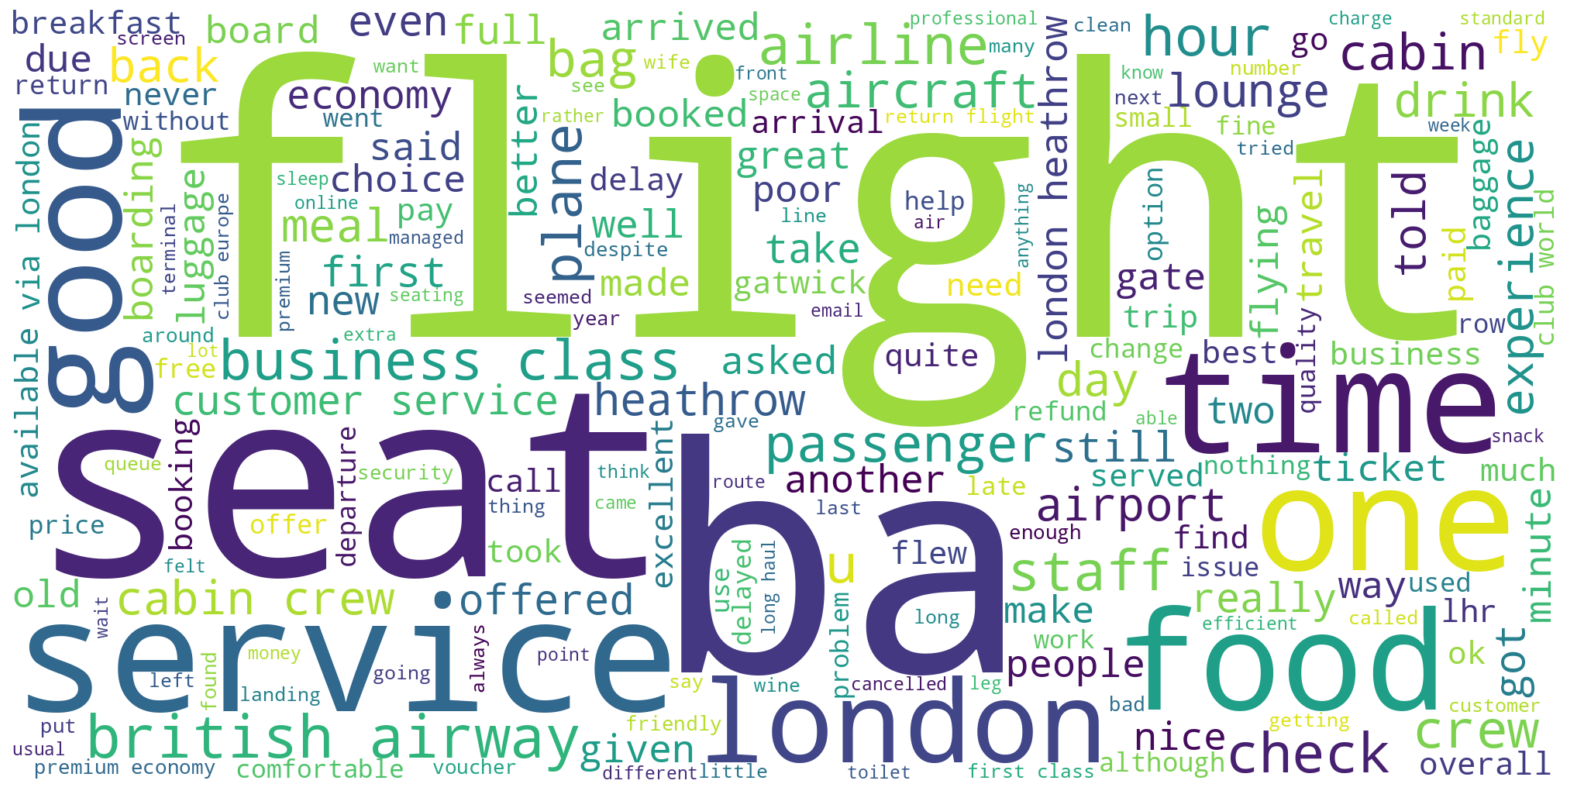

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()